In [16]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [4]:
absenteeism_file = 'Resources/MFGEmployees4.csv'

absenteeism_df = pd.read_csv(absenteeism_file, index_col=False)

absenteeism_df.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


In [5]:
# We want to round down to reflect age
absenteeism_df["Age"] = absenteeism_df["Age"].round()
absenteeism_df = absenteeism_df.drop(["Surname", "GivenName", "BusinessUnit"], axis=1)
absenteeism_df["LengthService"] = absenteeism_df["LengthService"].round(decimals=2)
absenteeism_df["AbsentHours"] = absenteeism_df["AbsentHours"].round(decimals=2)
absenteeism_df.head()

,EmployeeNumber,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours
0,1,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.0,6.02,36.58
1,2,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.0,5.53,30.17
2,3,M,Richmond,Baker,Bakery,Richmond,Stores,49.0,4.39,83.81
3,4,F,Victoria,Baker,Bakery,Victoria,Stores,45.0,3.08,70.02
4,5,M,New Westminster,Baker,Bakery,New Westminster,Stores,36.0,3.62,0.00


In [6]:
people_df = absenteeism_df[["EmployeeNumber", "Gender", "JobTitle", "Age", "LengthService", "AbsentHours"]]
location_df = absenteeism_df[["EmployeeNumber", "City", "DepartmentName", "StoreLocation", "Division", "AbsentHours"]]

In [7]:
people_df.head()

,EmployeeNumber,Gender,JobTitle,Age,LengthService,AbsentHours
0,1,F,Baker,32.0,6.02,36.58
1,2,M,Baker,40.0,5.53,30.17
2,3,M,Baker,49.0,4.39,83.81
3,4,F,Baker,45.0,3.08,70.02
4,5,M,Baker,36.0,3.62,0.00


In [41]:
location_df.head()

,EmployeeNumber,City,DepartmentName,StoreLocation,Division,AbsentHours
0,1,Burnaby,Bakery,Burnaby,Stores,36.58
1,2,Courtenay,Bakery,Nanaimo,Stores,30.17
2,3,Richmond,Bakery,Richmond,Stores,83.81
3,4,Victoria,Bakery,Victoria,Stores,70.02
4,5,New Westminster,Bakery,New Westminster,Stores,0.00


In [47]:
# The next line of code formats the data to meet the requirements of the Scikit-learn library:
# X = pd.get_dummies(people_df.Gender.values)
X = pd.get_dummies(people_df.Gender)
# Assign the target variable
y = people_df.AbsentHours

X.shape

(8336, 2)

In [49]:
X

,F,M
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
8331,1,0
8332,0,1
8333,1,0
8334,1,0


In [48]:
y.shape

(8336,)

In [50]:
y

0        36.58
1        30.17
2        83.81
3        70.02
4         0.00
         ...  
8331     93.67
8332      0.00
8333    176.36
8334     60.32
8335    112.02
Name: AbsentHours, Length: 8336, dtype: float64

ValueError: x and y must be the same size

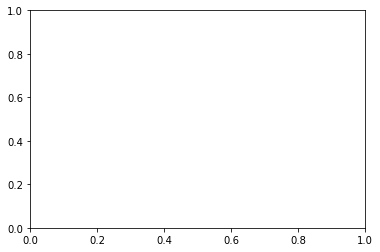

In [51]:
# Visualizing both classes
plt.scatter(X, y, c=y)